In [1]:
# 环境
import torch
import torch_geometric

print(torch.__version__)
print(torch_geometric.__version__)

1.13.1+cu116
2.3.1


### 一、数据集

##### 1.1 数据集介绍

Cora数据集由2708份科学出版物组成，分为七类之一。
数据集中的每个出版物由0/1值的词向量来描述，该词向量指示词典中对应词的不存在/存在。这本词典由1433个独特的单词组成。

- Nodes = Publications (Papers, Books ...)
- Edges = Citations
- Node Features = word vectors
- 7 Labels = Pubilcation type e.g. Neural_Networks, Rule_Learning, Reinforcement_Learning, 	Probabilistic_Methods...

In [2]:
from torch_geometric.data import Data
from torch_geometric.transforms import NormalizeFeatures

# 创建一个简单的图数据，包含节点特征
edge_index = torch.tensor([[0, 1, 1, 2], [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[1.0, 2.0, 3.0], [3.0, 4.0, 5.0], [5.0, 6.0, 8.0]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

# 应用 NormalizeFeatures 转换
transform = NormalizeFeatures()
data = transform(data)

# 打印归一化后的节点特征
print(data.x)

# NormalizeFeatures 转换将节点特征归一化，先减去最小值，然后使行和为1

tensor([[0.0000, 0.3333, 0.6667],
        [0.2222, 0.3333, 0.4444],
        [0.2500, 0.3125, 0.4375]])


In [3]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # 获取第一个图对象

print()
print(data)
print('===========================================================================================================')

# 获取这个图的统计信息
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True


##### 1.2 数据集信息

In [4]:
import numpy as np

# 设置打印选项，threshold设置为一个较大的值
torch.set_printoptions(threshold=np.inf)

print(data.x.shape)
data.x[1]

torch.Size([2708, 1433])


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0435, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0435, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [5]:
data.y

tensor([3, 4, 4, 0, 3, 2, 0, 3, 3, 2, 0, 0, 4, 3, 3, 3, 2, 3, 1, 3, 5, 3, 4, 6,
        3, 3, 6, 3, 2, 4, 3, 6, 0, 4, 2, 0, 1, 5, 4, 4, 3, 6, 6, 4, 3, 3, 2, 5,
        3, 4, 5, 3, 0, 2, 1, 4, 6, 3, 2, 2, 0, 0, 0, 4, 2, 0, 4, 5, 2, 6, 5, 2,
        2, 2, 0, 4, 5, 6, 4, 0, 0, 0, 4, 2, 4, 1, 4, 6, 0, 4, 2, 4, 6, 6, 0, 0,
        6, 5, 0, 6, 0, 2, 1, 1, 1, 2, 6, 5, 6, 1, 2, 2, 1, 5, 5, 5, 6, 5, 6, 5,
        5, 1, 6, 6, 1, 5, 1, 6, 5, 5, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 4, 3, 0, 3,
        6, 6, 0, 3, 4, 0, 3, 4, 4, 1, 2, 2, 2, 3, 3, 3, 3, 0, 4, 5, 0, 3, 4, 3,
        3, 3, 2, 3, 3, 2, 2, 6, 1, 4, 3, 3, 3, 6, 3, 3, 3, 3, 0, 4, 2, 2, 6, 5,
        3, 5, 4, 0, 4, 3, 4, 4, 3, 3, 2, 4, 0, 3, 2, 3, 3, 4, 4, 0, 3, 6, 0, 3,
        3, 4, 3, 3, 5, 2, 3, 2, 4, 1, 3, 2, 2, 3, 3, 3, 3, 5, 1, 3, 1, 3, 5, 0,
        3, 5, 0, 4, 2, 4, 2, 4, 4, 5, 4, 3, 5, 3, 3, 4, 3, 0, 4, 5, 0, 3, 6, 2,
        5, 5, 5, 3, 2, 3, 0, 4, 5, 3, 0, 4, 0, 3, 3, 0, 0, 3, 5, 4, 4, 3, 4, 3,
        3, 2, 2, 3, 0, 3, 1, 3, 2, 3, 3,

类别 0: 351 个样本
类别 1: 217 个样本
类别 2: 418 个样本
类别 3: 818 个样本
类别 4: 426 个样本
类别 5: 298 个样本
类别 6: 180 个样本


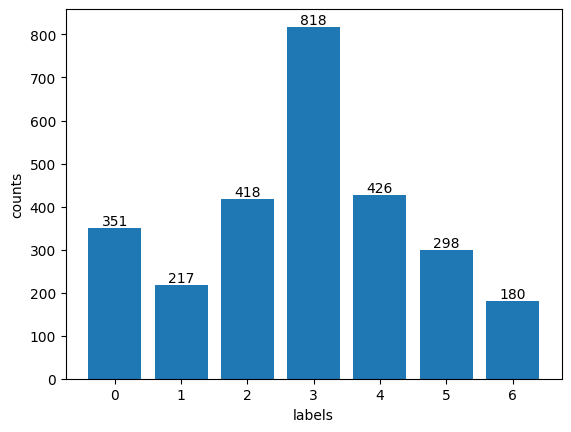

In [6]:
import matplotlib.pyplot as plt

# 统计每个类别的数量
unique_labels, counts = torch.unique(data.y, return_counts=True)

# 打印每个类别的数量
for label, count in zip(unique_labels, counts):
    print(f"类别 {label.item()}: {count.item()} 个样本")

# 使用直方图可视化
plt.bar(unique_labels.numpy(), counts.numpy())
plt.xlabel('labels')
plt.ylabel('counts')

# 在每个条形上方添加数字标签
for label, count in zip(unique_labels, counts):
    plt.text(label.item(), count.item(), str(count.item()), ha='center', va='bottom')

plt.show()

In [7]:
# 设置打印选项，变成默认值
torch.set_printoptions(profile='default')

print(data.edge_index.shape)
data.edge_index

torch.Size([2, 10556])


tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])

In [8]:
data.edge_index.t()

tensor([[   0,  633],
        [   0, 1862],
        [   0, 2582],
        ...,
        [2707,  598],
        [2707, 1473],
        [2707, 2706]])

In [9]:
data.train_mask

tensor([ True,  True,  True,  ..., False, False, False])

##### 1.3 NetworkX可视化

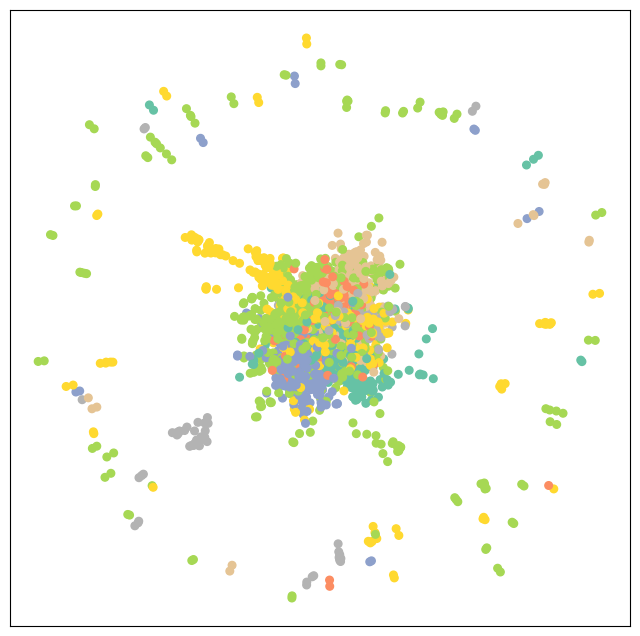

In [10]:
import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

# 转换成 NetworkX 无向图
G = to_networkx(data, to_undirected=True)

# 使用 spring_layout 进行布局
pos = nx.spring_layout(G, seed=16)

# 创建图形对象
plt.figure(figsize=(8, 8))

# 绘制节点
nx.draw_networkx_nodes(G, pos=pos, node_color=data.y, cmap="Set2", node_size=30)

# 显示可视化结果
plt.show()

### 二、模型训练

##### 2.1 模型

In [11]:
import torch.nn as nn
from torch_geometric.nn import GCNConv

class GCN_Core(nn.Module):
    def __init__(self, output_channels=7):
        super(GCN_Core, self).__init__()

        self.conv1 = GCNConv(1433, 64)        
        self.conv2 = GCNConv(64, 7)
        
        self.dp = nn.Dropout(p=0.5)

    def forward(self, x, edge_index):
        
        x = self.conv1(x, edge_index) # (num_nodes, num_features=1433) ——> (num_nodes, num_features=64)
        x = F.relu(x)
        
        x = self.dp(x) # Dropout
        x = self.conv2(x, edge_index) # (num_nodes, num_features=64) ——> (num_nodes, dataset.num_classes=7)

        return x

model = GCN_Core()
print(model)

GCN_Core(
  (conv1): GCNConv(1433, 64)
  (conv2): GCNConv(64, 7)
  (dp): Dropout(p=0.5, inplace=False)
)


In [12]:
# 统计模型总参数量
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params}")

Total parameters: 92231


##### 2.2 模型训练和评估

In [13]:
import torch.optim as optim
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # 使用GPU or CPU

model = model.to(device) # 加载模型
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4) # 优化器
criterion = nn.CrossEntropyLoss(reduction='mean')  # 损失函数

data = data.to(device)

for epoch in range(101):
    #################
    ###   Train   ###
    #################
    model.train() # 训练模式
    optimizer.zero_grad()  # 梯度清0
    train_outputs = model(data.x, data.edge_index)  # 前向传播
    loss = criterion(train_outputs[data.train_mask], data.y[data.train_mask])  # 计算损失
    loss.backward()  # 反向传播
    optimizer.step()  # 参数更新
    
    train_preds = train_outputs.argmax(dim=1) # 训练预测
    train_correct = train_preds[data.train_mask] == data.y[data.train_mask]  # 训练：预测正确
    train_accuracy = int(train_correct.sum()) / int(data.train_mask.sum())  # 训练节点准确率
    
    ################
    ###   Test   ###
    ################
    model.eval() # 测试模式
    test_outputs = model(data.x, data.edge_index)  # 预测输出
    
    test_preds = test_outputs.argmax(dim=1) # 测试预测
    test_correct = test_preds[data.test_mask] == data.y[data.test_mask]  # 测试：预测正确
    test_accuracy = int(test_correct.sum()) / int(data.test_mask.sum())  # 测试节点准确率

    if epoch % 10 == 0:
        print('Epoch #{:03d}, Loss: {:.4f}, Train_Accuracy: {:.4f}, Test_Accuracy: {:.4f}'.format(epoch, loss, train_accuracy, test_accuracy))

Epoch #000, Loss: 1.9470, Train_Accuracy: 0.1071, Test_Accuracy: 0.4240
Epoch #010, Loss: 1.6992, Train_Accuracy: 0.9286, Test_Accuracy: 0.7670
Epoch #020, Loss: 1.2256, Train_Accuracy: 0.9571, Test_Accuracy: 0.7860
Epoch #030, Loss: 0.6915, Train_Accuracy: 0.9786, Test_Accuracy: 0.8050
Epoch #040, Loss: 0.3673, Train_Accuracy: 0.9786, Test_Accuracy: 0.8260
Epoch #050, Loss: 0.2354, Train_Accuracy: 0.9714, Test_Accuracy: 0.8080
Epoch #060, Loss: 0.1609, Train_Accuracy: 0.9929, Test_Accuracy: 0.8180
Epoch #070, Loss: 0.1227, Train_Accuracy: 0.9929, Test_Accuracy: 0.8170
Epoch #080, Loss: 0.1077, Train_Accuracy: 1.0000, Test_Accuracy: 0.8190
Epoch #090, Loss: 0.0992, Train_Accuracy: 1.0000, Test_Accuracy: 0.8200
Epoch #100, Loss: 0.0958, Train_Accuracy: 1.0000, Test_Accuracy: 0.8160


##### 2.3 TSNE可视化

t-SNE是一种可视化高维数据的工具。它将数据点之间的相似性转换为联合概率，并试图最小化低维嵌入和高维数据的联合概率之间的Kullback-Leibler散度。t-SNE具有非凸的代价函数，即通过不同的初始化，我们可以得到不同的结果。

- 1.定义相似性： 对于高维数据中的每对数据点，通过高斯分布来定义它们之间的相似性。高维空间中相似的点将有较高的概率成为邻居。
- 2.在低维空间中定义相似性： 在低维空间中，同样定义相似性。t-SNE使用t分布（t-distribution）来表示低维空间中的相似性，以便更好地处理困惑度（perplexity）参数。困惑度类似于高斯分布中的标准差，控制每个点的邻居数量。
- 3.最小化KL散度： t-SNE的目标是在低维空间中保留相似性。通过最小化高维和低维空间中相似性分布之间的KL散度（Kullback-Leibler divergence），来实现这一点。KL散度衡量两个分布之间的差异，使得在低维空间中相似的点仍然保持相似。
- 4.梯度下降： 使用梯度下降算法来优化目标函数，将高维数据映射到低维空间。在这个过程中，相似的点将保持在低维空间中靠近彼此。

In [14]:
from sklearn.manifold import TSNE

def plt2arr(fig):
    rgb_str = fig.canvas.tostring_rgb()  # 将图形对象转换为RGB字符串表示
    (w, h) = fig.canvas.get_width_height()  # 获取图形对象的宽度和高度
    rgba_arr = np.frombuffer(rgb_str, dtype=np.uint8).reshape((h, w, 3))  # 使用NumPy从字符串中创建一个三维数组（高度 x 宽度 x 3通道）
    return rgba_arr  # 返回转换后的NumPy数组

def visualize(emb, color, epoch):
    fig = plt.figure(figsize=(6,6), frameon=False)
    fig.suptitle(f'Epoch = {epoch}')
    
    # TSNE降为2维
    z = TSNE(n_components=2).fit_transform(emb.detach().cpu().numpy())

    # 散点图
    plt.xticks([])
    plt.yticks([])
    plt.scatter(z[:, 0],
                z[:, 1],
                s=30,
                c=color.detach().cpu().numpy(),
                cmap="Set2")
    # 强制显示
    fig.canvas.draw() 
    
    return plt2arr(fig)

TSNE Visualization Finished.


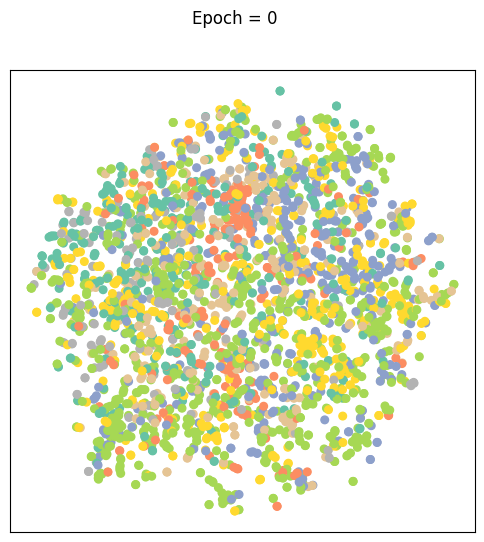

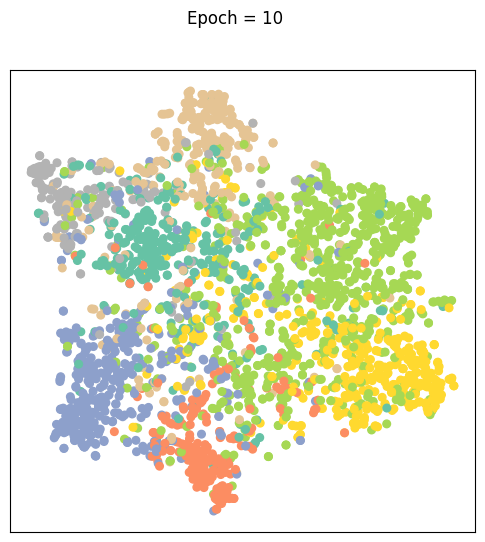

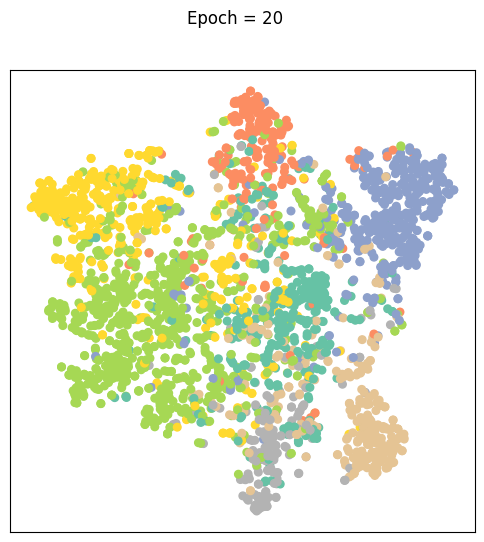

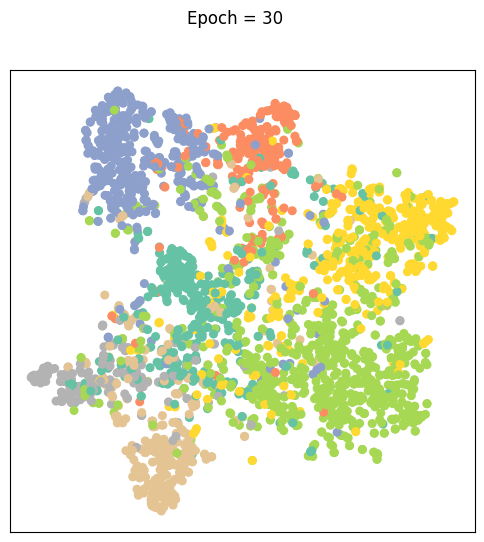

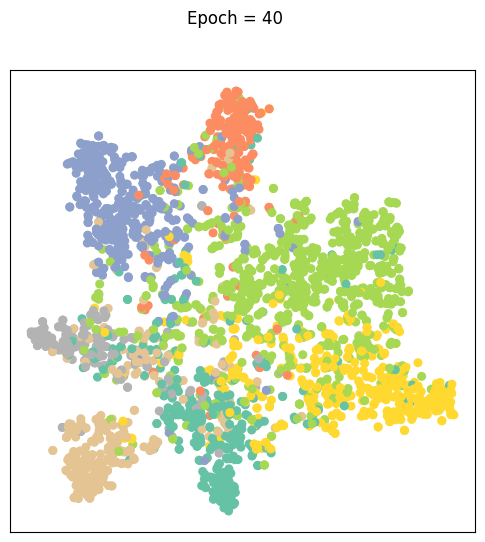

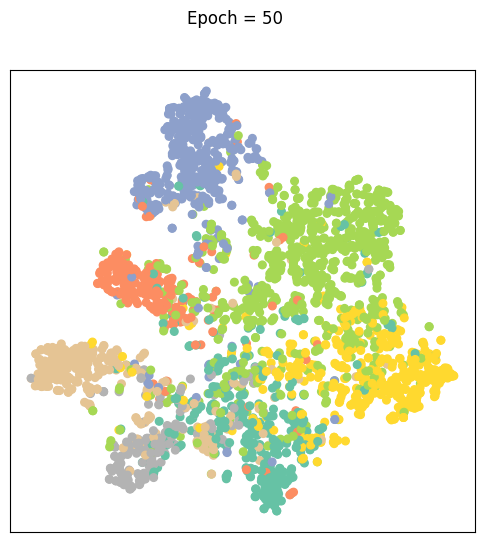

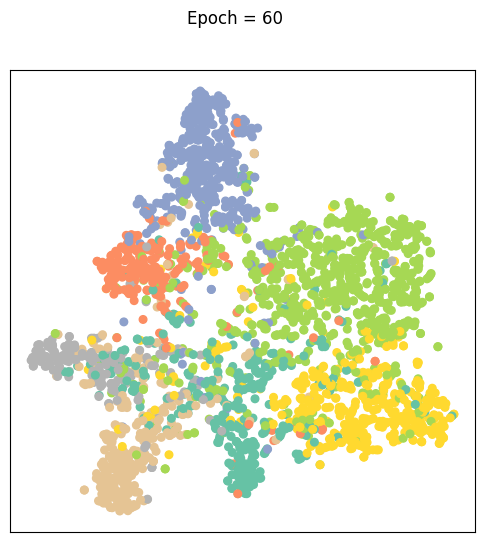

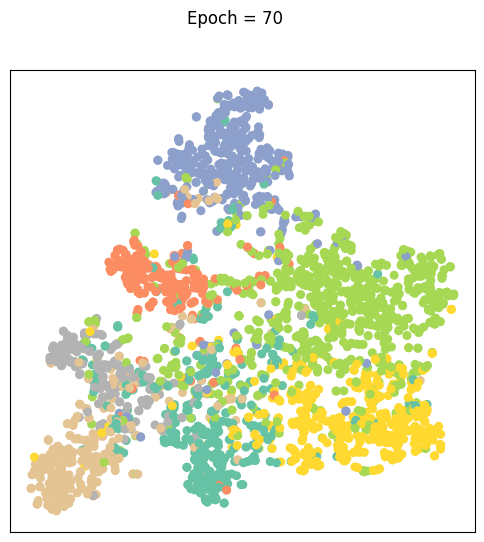

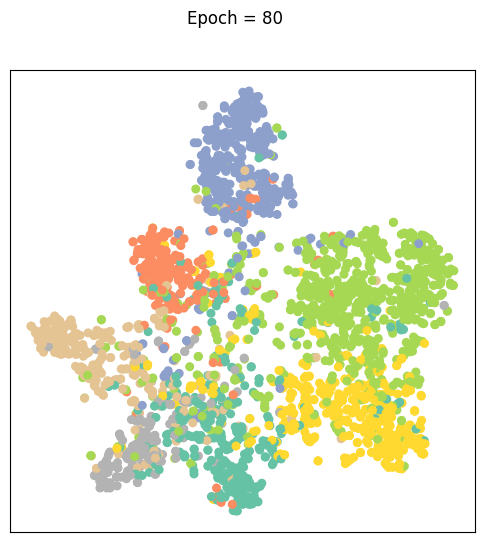

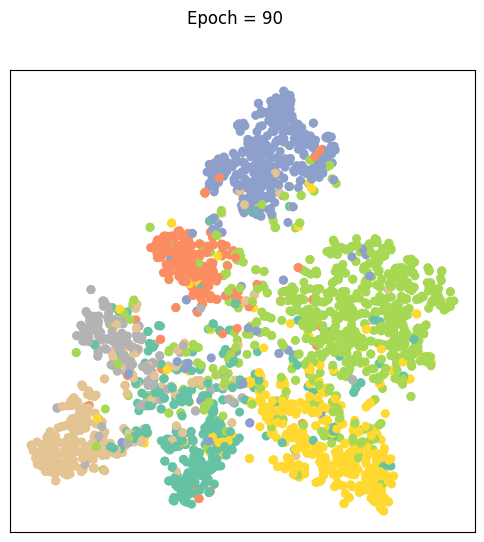

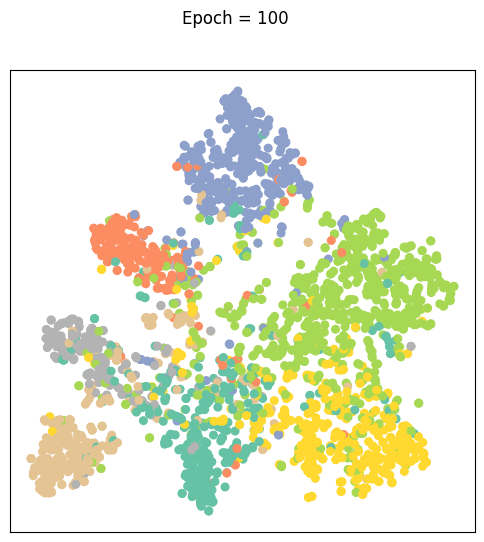

In [15]:
# 重置先前训练的模型权重
for layer in model.children():
    if hasattr(layer, 'reset_parameters'):
        layer.reset_parameters()

# 训练模型并保存可视化结果
images = []

for epoch in range(101):
    #################
    ###   Train   ###
    #################
    model.train() # 训练模式
    optimizer.zero_grad()  # 梯度清0
    train_outputs = model(data.x, data.edge_index)  # 前向传播
    loss = criterion(train_outputs[data.train_mask], data.y[data.train_mask])  # 计算损失
    loss.backward()  # 反向传播
    optimizer.step()  # 参数更新
    
    if epoch % 10 == 0:
        images.append(visualize(train_outputs, color=data.y, epoch=epoch))
print("TSNE Visualization Finished.")

MoviePy - Building file Core_GCN_Embeddings.gif with imageio.


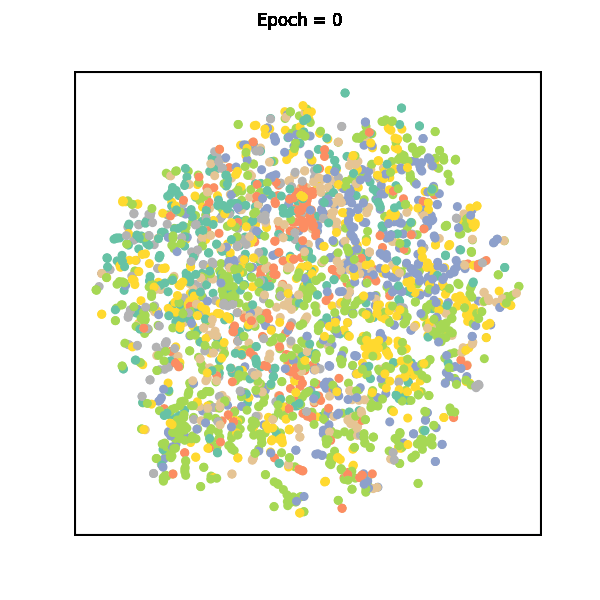

In [16]:
from moviepy.editor import ImageSequenceClip
from IPython.display import Image, display

filename = "Core_GCN_Embeddings.gif"
fps = 0.001

# 使用ImageSequenceClip创建GIF
clip = ImageSequenceClip(images, fps=fps)  

# 保存GIF
clip.write_gif(filename, fps=fps)  

# 显示GIF
display(Image(filename))